<a href="https://colab.research.google.com/github/robin-ochieng/Machine-Learning/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
data = pd.read_csv('Data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [9]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


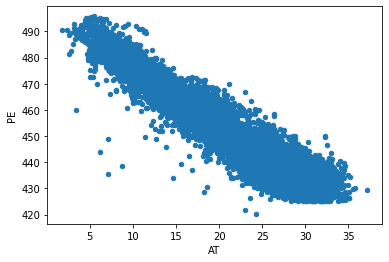

In [19]:
data.plot(x ='AT', y = 'PE', kind= 'scatter')

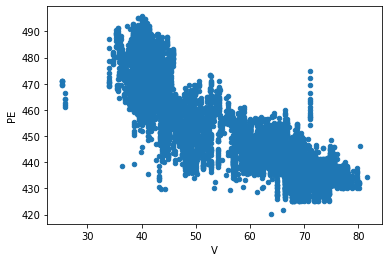

In [20]:
data.plot(x ='V', y = 'PE', kind= 'scatter')

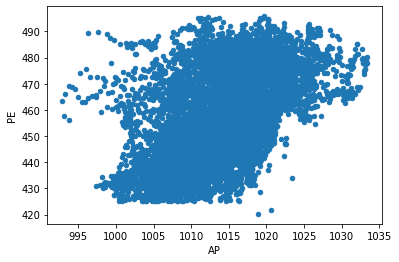

In [21]:
data.plot(x ='AP', y = 'PE', kind= 'scatter')

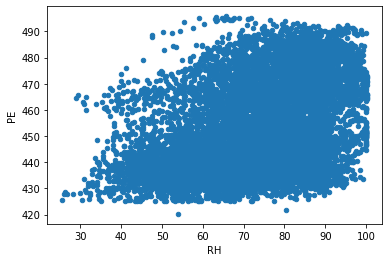

In [22]:
data.plot(x ='RH', y = 'PE', kind= 'scatter')

## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
regressor.coef_

array([-1.97313099, -0.23649993,  0.06387891, -0.15807019])

In [32]:
print(regressor.coef_, regressor.intercept_, regressor.score(X, y))

[-1.97313099 -0.23649993  0.06387891 -0.15807019] 452.8410371616383 0.9286947104407257


# Using Statsmodels alternatively.

In [38]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()

In [40]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.939e+07
Date:                Thu, 18 Aug 2022   Prob (F-statistic):                        0.00
Time:                        11:29:38   Log-Likelihood:                         -29068.
No. Observations:                9568   AIC:                                  5.814e+04
Df Residuals:                    9564   BIC:                                  5.817e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Predicting the Test set results

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


## Evaluating the Model Performance

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9325315554761303